## Applied Machine Learning: Homework 7, Problem 2
Group members:  
* Eloise Rosen, NetID: eloiser2 
* Mark Berman, NetID: markcb2

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans

## Image segmentation using EM 
Starting images

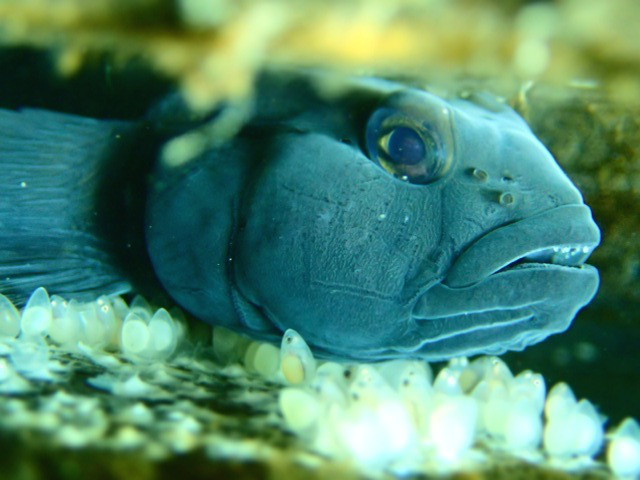

In [2]:
# help reading in images and dealing with pixel values from Dave Webb at:
# https://stackoverflow.com/questions/138250/how-can-i-read-the-rgb-value-of-a-given-pixel-in-python
image_1 = Image.open('RobertMixed03.jpg')
image_2 = Image.open('smallstrelitzia.jpg')
image_3 = Image.open('smallsunset.jpg')
image_1

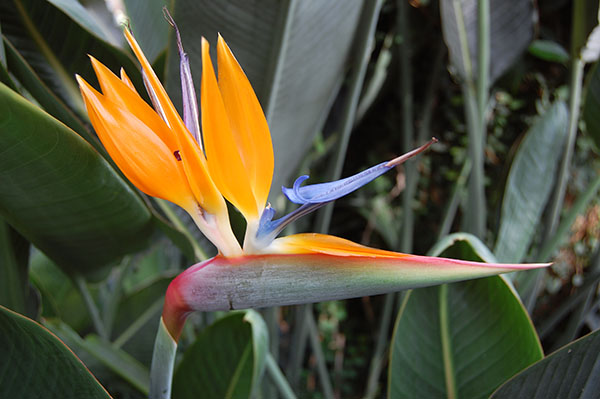

In [11]:
image_2

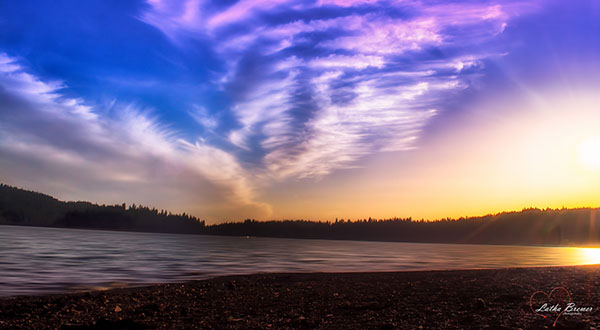

In [12]:
image_3

What are our image sizes?

In [3]:
print(image_1.size) # (width, height)
print(image_2.size)
print(image_3.size)

(640, 480)
(600, 399)
(600, 330)


In [ ]:
# TODO just do image 1 right now, then go back and put everything in my for loop I have at 
# near the end of my notebook

In [4]:
# help with accessing pixel values from zenpoy at
# https://stackoverflow.com/questions/13550376/pil-image-to-array-numpy-array-to-array-python
df = pd.DataFrame(list(image_1.getdata()), columns=['r','b', 'g'])

In [5]:
df.head()

,r,b,g
0,151,191,105
1,150,190,104
2,149,189,103
3,149,187,102
4,148,186,99


In [7]:
df = df.head(1000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
r    1000 non-null int64
b    1000 non-null int64
g    1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


In [8]:
num_segments = 10

In [9]:
def random_initialization(num_segments, df):
    """
    Randomly initialize mu values (cluster centers) and pi values (cluster weights).
    Cluster weights need to add up to 1. Both mu and pi should have the same
    number of points as num_segments.
    """
    # mu values
    kmeans = KMeans(n_clusters=num_segments, random_state=0).fit(df)
    mu = kmeans.cluster_centers_
    # number of points in mu matches segment_num, and each has 3 values (r, b, g)
    
    # pi values
    pi = np.random.uniform(0, 1, size=num_segments)
    pi = pi / sum(pi)
         
    return mu, pi

In [10]:
mu, pi = random_initialization(num_segments, df)

In [11]:
print(mu)

[[ 158.98726115  191.9044586   117.68789809]
 [  75.55357143  108.03571429   50.25      ]
 [ 124.31111111  151.2          79.47777778]
 [ 175.46979866  219.4966443   150.03355705]
 [ 164.87292818  203.46961326  134.04972376]
 [  36.0952381    64.80952381   13.42857143]
 [ 147.10526316  179.82894737  105.00657895]
 [ 199.17142857  235.08571429  155.34285714]
 [ 101.19512195  129.26829268   63.36585366]
 [  57.03092784   91.8556701    32.59793814]]


In [13]:
print(pi)
print(sum(pi))

[ 0.03432535  0.15766982  0.13727301  0.09985062  0.03672876  0.15822555
  0.11218695  0.00872708  0.11953744  0.13547541]
1.0


## E-step
<img src="e_step.png">

In [14]:
# we need to recompute w
df.head() # these are my x_i values

,r,b,g
0,151,191,105
1,150,190,104
2,149,189,103
3,149,187,102
4,148,186,99


In [15]:
pi[0]

0.034325354067792364

In [16]:
x_i_minus_mu_j_list = [0] * num_segments # this will be a list of dataframes
# there are j spots in this list

numerator_list = [0] * num_segments

# go through all the j values, calculating x_i - mu_j for each
for j in range(0, num_segments):
    # x_i minus mu_j. doing for all the i's at once, but only 1 j at a time
    x_i_minus_mu_j_list[j] = df - mu[j]
    
    # "whole_x_i_minus_mu_j_part" is (x_i - mu_j)T * (x_i - mu_j)
    whole_x_i_minus_mu_j_part = np.diagonal(np.asarray(x_i_minus_mu_j_list[j]).astype('float128') * 
    np.matrix(np.asarray(x_i_minus_mu_j_list[j]).astype('float128')).T)
    
    numerator_list[j] = np.exp(-.5 * whole_x_i_minus_mu_j_part) * pi[j]

In [17]:
# denominator needs to be calculated only once, because it sums over all the j's
denom = np.copy(numerator_list[0])
for j in range(1, num_segments):
    denom = denom + numerator_list[j]
    
# TODO sometimes denom values are 0, which gives div error later. Is that expected?
denom[denom == 0] = .00000001

In [18]:
wij_list = [0] * num_segments
for j in range(0, num_segments):
    wij_list[j] = numerator_list[j] / denom

In [19]:
pd.DataFrame(wij_list[0]).head()

,0
0,7.764523e-20
1,9.507664e-36
2,1.164214e-51
3,1.174763e-67
4,1.390130e-94


In [20]:
len(wij_list[0])

1000

In [21]:
len(wij_list)

10

In [27]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([1,1,2])
d = np.array([2,2,2])
four_pixels = np.vstack((a,b,c,d))
four_pixels 

array([[1, 2, 3],
       [4, 5, 6],
       [1, 1, 2],
       [2, 2, 2]])

In [222]:
one_pixel = np.array([1,2,3])
one_pixel

array([1, 2, 3])

In [22]:
len(wij_list[0])

1000

In [23]:
wij_list[0][0:4]

array([ 7.7645235e-20,  9.507664e-36,  1.1642141e-51,  1.1747627e-67], dtype=float128)

In [26]:
pd.DataFrame(four_pixels * wij_list[0][0:4])

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [237]:
(four_pixels * wij)

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [ 2,  2,  4],
       [ 4,  4,  4]])

In [238]:
np.asarray(pd.DataFrame(four_pixels * wij).sum())

array([16, 20, 26])

In [161]:
mu = np.array([0,2,0])
mu

array([0, 2, 0])

In [114]:
a = np.array([1,2,3])
b = np.array([4,5,6])
two_pixels = np.vstack((a,b))
two_pixels = pd.DataFrame(two_pixels)

two_pixels

,0,1,2
0,1,2,3
1,4,5,6


In [155]:
wij = np.array([.1,.5,3])
#wij = np.asmatrix(wij).T

wij = pd.DataFrame(np.asmatrix(wij).T)

wij

,0
0,0.1
1,0.5
2,3.0


In [156]:
wij.sum()

0    3.6
dtype: float64

array([ 2.1,  2.7,  3.3])

In [79]:
# multiply pixels by the appropriate wij value
new_df = two_pixels.copy(deep=True)
new_df

,0,1,2
0,1,2,3
1,4,5,6


In [81]:
two_pixels[0] * wij

,0,1
0,0.1,NaN
1,0.5,NaN


In [76]:
for i in range (0,3):
    new_df[i] = two_pixels[i] * wij
new_df

,0,1,2
0,0.1,0.2,0.3
1,0.5,1.0,1.5


In [150]:
xi_minus_mui = two_pixels - mu
xi_minus_mui

array([[1, 0, 3],
       [4, 3, 6]])

In [151]:
np.asmatrix(xi_minus_mui).T

matrix([[1, 4],
        [0, 3],
        [3, 6]])

In [152]:
xi_minus_mui * np.asmatrix(xi_minus_mui).T

matrix([[10, 22],
        [22, 61]])

In [ ]:
np.asmatrix(

In [128]:
four_pixels  * np.asmatrix(np.array([0,2,0])).T

matrix([[ 4],
        [10],
        [16],
        [22]])

In [131]:
np.exp (-.5 * four_pixels  * np.asmatrix(np.array([0,2,0])).T) * .2

matrix([[  2.70670566e-02],
        [  1.34758940e-03],
        [  6.70925256e-05],
        [  3.34034016e-06]])

## M-step
<img src="m_step.png">

**calculate the new mu values**

In [162]:
def calc_new_mu_numerator(pixels, wij_col):
    pixels = pd.DataFrame(pixels)
    wij_col = pd.DataFrame(wij_col)
    numerator = pd.concat([pixels, wij_col], axis=1)
    numerator.columns.values[3] = 3
    #  numerator[3] is wij
    numerator['r'] = numerator['r'] * numerator[3]
    numerator['b'] = numerator['b'] * numerator[3]
    numerator['g'] = numerator['g'] * numerator[3]
    del numerator[3]
    numerator = np.asarray(numerator.sum())
    return numerator

def calc_new_mu(df, wij_list, num_segments):
    new_mu_list =  [0] * num_segments
    for j in range(0, num_segments):
        new_mu_numerator = calc_new_mu_numerator(df, wij_list[j])
        new_mu_denom = wij_list[j].sum()
        new_mu_list[j] = new_mu_numerator / new_mu_denom
    return new_mu_list
        
# TODO maybe convert new_mu_list back into array like original mu array, for the e step

new_mu_list = calc_new_mu(df, wij_list, num_segments)

In [166]:
len(new_mu_list)

10

In [119]:
mu

array([[ 158.98726115,  191.9044586 ,  117.68789809],
       [  75.55357143,  108.03571429,   50.25      ],
       [ 124.31111111,  151.2       ,   79.47777778],
       [ 175.46979866,  219.4966443 ,  150.03355705],
       [ 164.87292818,  203.46961326,  134.04972376],
       [  36.0952381 ,   64.80952381,   13.42857143],
       [ 147.10526316,  179.82894737,  105.00657895],
       [ 199.17142857,  235.08571429,  155.34285714],
       [ 101.19512195,  129.26829268,   63.36585366],
       [  57.03092784,   91.8556701 ,   32.59793814]])

In [220]:
df * 

,r,b,g
0,151,191,105
1,150,190,104
2,149,189,103
3,149,187,102
4,148,186,99
5,149,185,98
6,148,184,97
7,148,184,96
8,149,183,96
9,149,183,96


In [216]:
pd.DataFrame(wij_list[0]).head()

,0
0,0.020365
1,0.020365
2,0.020365
3,0.020365
4,0.020365


In [217]:
len(wij_list[0])

1000

In [47]:
# going from dataframe to a new image
def df_to_image(original_image, df):
    """
    Takes in original unaltered image (needed for mode and size), and dataframe
    of pixel values. Converts df values back into an image.
    
    """
    pixel_list = list(df.itertuples(index=False, name=None))
    new_image = Image.new(original_image.mode, original_image.size)
    new_image.putdata(pixel_list)
    return new_image

altered_image = df_to_image(image_1, df)
image_1.save("altered_image.png") 

In [50]:
image_list = [image_1, image_2, image_3]
for i in image_list:
    # this for work definitely works

(640, 480)
(600, 399)
(600, 330)


In [19]:
pixels_1 = image_1.load() # get the pixel values from an image
print(pixels_1[3,4]) #Get the RGBA Value of the a pixel of an image

(10, 11, 12)


In [18]:
pixels_1[3,4] = (10, 11, 12) # Set the RGBA Value of the image (tuple)

In [20]:
image_1.save("altered_image_1.png") # Save the modified pixels as png

You can segment an image using a clustering method - each segment is the cluster center to which a pixel belongs. In this exercise, you will represent an image pixel by its r, g, and b values (so use color images!). Use the EM algorithm applied to the mixture of normal distribution model lectured in class to cluster image pixels, then segment the image by mapping each pixel to the cluster center with the highest value of the posterior probability for that pixel. You must implement the EM algorithm yourself (rather than using a package). Test images are here, and you should display results for all three of them. Till then, use any color image you care to.

Segment each of the test images to 10, 20, and 50 segments. You should display these segmented images as images, where each pixel's color is replaced with the mean color of the closest segment

We will identify one special test image. You should segment this to 20 segments using five different start points, and display the result for each case. Is there much variation in the result?

### Citations
My citations are included as comments in my code. They are repeated below for convenience.
* help reading in images and dealing with pixel values from Dave Webb at https://stackoverflow.com/questions/138250/how-can-i-read-the-rgb-value-of-a-given-pixel-in-python
*  help with accessing pixel values from zenpoy at https://stackoverflow.com/questions/13550376/pil-image-to-array-numpy-array-to-array-python

In [14]:
w = pd.DataFrame(np.zeros((len(df), num_segments)))
# w is a df that has a number of rows correpsonding to the number of pixels,
# and a number of columns corresponding the number of segments
# w_ij gives us the probability that pixel i belongs to cluster j
w.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
